__Project: Customer segmentation__


## Description:



__Business Goal:__
Develop a customer segmentation to define marketing strategy. 

- The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

__Describing the data:__
 Following is the Data Dictionary for Credit Card dataset :-

- CUSTID : Identification of Credit Card holder (Categorical) .

- BALANCE : Balance amount left in their account to make purchases .
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated).

- PURCHASES : Amount of purchases made from account .

- ONEOFFPURCHASES : Maximum purchase amount done in one-go .

- INSTALLMENTSPURCHASES : Amount of purchase done in installment .

- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user


-Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

## Introduction



* We have 18 columns  .

* This a problem of unsupervised machine learning .

* We will use a diferent tecniques  (PCA,KNN, agglomerative clustering )  .


 


# Exploratory Data Analysis

* Import library and the csv file and examine its contents.
* Summary statistics and check variable data types .
* Check missing values .
* Check the correlation between variables .
* Detect and remove outliers .
* Data  distribution 

### Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('Marketing_data (1).csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [4]:
data.shape

(8950, 18)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Summary Statistics
* The average balance is 1564 .
* The frequency of the balance sheet is updated quite often, on average ~0.9
* The average purchase is $1000 .
* The maximum non-recurring purchase amount is on average ~ 600
* The average frequency of purchases is close to 0.5
* The average de ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, y CASH_ADVANCE_FREQUENCY is low en general
* The average of the credit limit is ~ 4500
* Customers have been in service for an average of 11 years

In [6]:
data.describe(percentiles=[0.05,0.25,0.5,0.75,0.95]).round(2)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8949.00,8950.00,8637.00,8950.00,8950.00
mean,1564.47,0.88,1003.20,592.44,411.07,978.87,0.49,0.20,0.36,0.14,3.25,14.71,4494.45,1733.14,864.21,0.15,11.52
std,2081.53,0.24,2136.63,1659.89,904.34,2097.16,0.40,0.30,0.40,0.20,6.82,24.86,3638.82,2895.06,2372.45,0.29,1.34
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.02,0.00,6.00
5%,8.81,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1000.00,89.99,73.28,0.00,8.00
25%,128.28,0.89,39.64,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,1.00,1600.00,383.28,169.12,0.00,12.00
50%,873.39,1.00,361.28,38.00,89.00,0.00,0.50,0.08,0.17,0.00,0.00,7.00,3000.00,856.90,312.34,0.00,12.00
75%,2054.14,1.00,1110.13,577.40,468.64,1113.82,0.92,0.30,0.75,0.22,4.00,17.00,6500.00,1901.13,825.49,0.14,12.00
95%,5909.11,1.00,3998.62,2671.09,1750.09,4647.17,1.00,1.00,1.00,0.58,15.00,57.00,12000.00,6082.09,2766.56,1.00,12.00
max,19043.14,1.00,49039.57,40761.25,22500.00,47137.21,1.00,1.00,1.00,1.50,123.00,358.00,30000.00,50721.48,76406.21,1.00,12.00


__A simple sight we can detect outliers__ 

 for example in PURCHASEs , median is 361.28 and 75% quantile is 1110 and the max is so far 49039


### Check for missing values 


In [7]:

data.isnull().sum().to_frame().rename(columns={0:'Null_val'}).query('Null_val>0')

,Null_val
CREDIT_LIMIT,1
MINIMUM_PAYMENTS,313


<Figure size 720x432 with 0 Axes>

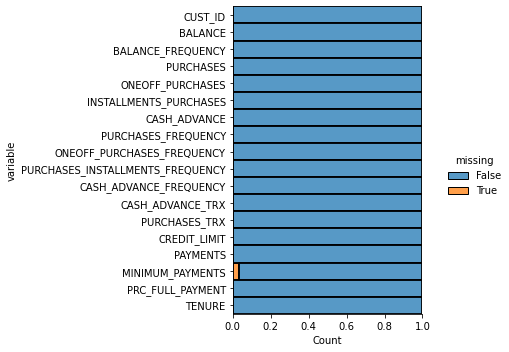

In [8]:
plt.figure(figsize=(10,6))
sns.displot(
    data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)

### Fill missing values

In [9]:
data[data.CREDIT_LIMIT.isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='Density'>

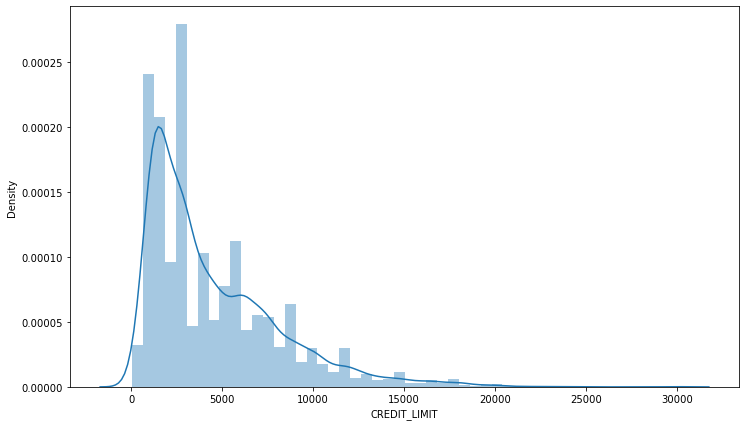

In [10]:
plt.figure(figsize=(12,7))
sns.distplot(data.CREDIT_LIMIT)

In [14]:
# Let's fill in the missing data with the average of the field 'CREDIT_LIMIT' 
# THERE ARE MANY ALGORITHMS THAT FILL US THE NAN FOR EXAMPLE SIMPLEIMPUTER OR KNNINMPUTER
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT'] = data['CREDIT_LIMIT'].mean()


<AxesSubplot:xlabel='MINIMUM_PAYMENTS'>

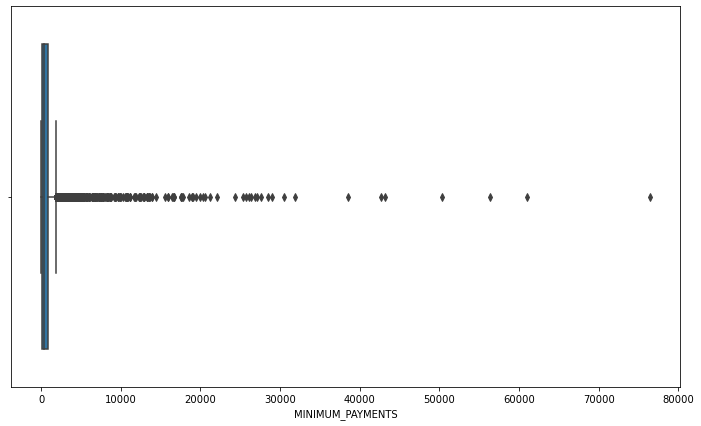

In [11]:
plt.figure(figsize=(12,7))
sns.boxplot(data.MINIMUM_PAYMENTS)

  We fill Each sample’s missing values using the median value .

In [12]:

data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].median()

In [15]:
data.isnull().sum()


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [16]:

data.duplicated().sum()

0

In [17]:
# we drop Cust_id 
data.drop("CUST_ID", axis = 1, inplace=True)

### Detect and remove outliers 
- IQR score
- Outlier sensitivity: K-NN algorithm is very sensitive to outliers as it simply chose the neighbors based on distance criteria.
- Use knnImputer to fill nan produced by replacing outliers with nan.


In [18]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

BALANCE                             1925.858120
BALANCE_FREQUENCY                      0.111111
PURCHASES                           1070.495000
ONEOFF_PURCHASES                     577.405000
INSTALLMENTS_PURCHASES               468.637500
CASH_ADVANCE                        1113.821139
PURCHASES_FREQUENCY                    0.833334
ONEOFF_PURCHASES_FREQUENCY             0.300000
PURCHASES_INSTALLMENTS_FREQUENCY       0.750000
CASH_ADVANCE_FREQUENCY                 0.222222
CASH_ADVANCE_TRX                       4.000000
PURCHASES_TRX                         16.000000
CREDIT_LIMIT                        4900.000000
PAYMENTS                            1517.858151
MINIMUM_PAYMENTS                     617.855846
PRC_FULL_PAYMENT                       0.142857
TENURE                                 0.000000
dtype: float64


In [19]:
MIN=Q1 - 1.5 * IQR
MAX=Q3 + 1.5 * IQR

In [20]:
outliers=((data< MIN) |(data> MAX))

In [22]:
outliers.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [194]:
#data2=data.copy()

In [199]:
#for col in data2.columns:
 #   data2[col]=np.where(outliers[col]==True,pd.NA,data2[col])
    

In [23]:
#removig outliers
data_No_outlieres=data[~outliers]

In [24]:
data_No_outlieres.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.0,NaN,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,NaN,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,NaN,1499.00,NaN,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0


In [25]:
data_No_outlieres.isnull().sum()

BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         248
PAYMENTS                             808
MINIMUM_PAYMENTS                     909
PRC_FULL_PAYMENT                    1474
TENURE                              1366
dtype: int64

__KNN IMPUTER:__

Imputation for completing missing values using k-Nearest Neighbors.

Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

In [26]:
from sklearn.impute import KNNImputer

knImputer= KNNImputer()
data_No_outlieres=pd.DataFrame(knImputer.fit_transform(data_No_outlieres),columns=data_No_outlieres.columns)


In [27]:
data_No_outlieres.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [28]:
data_No_outlieres.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.0
mean,1233.478479,0.977871,613.634899,230.756709,224.587014,454.098212,0.490351,0.169219,0.364437,0.105120,1.761274,10.404715,4283.925428,1190.166445,487.977351,0.031493,12.0
std,1270.230476,0.060313,673.367968,345.302791,285.199558,700.643915,0.401371,0.227226,0.397448,0.140780,2.585049,10.758171,3103.557615,997.230962,420.713422,0.070101,0.0
min,0.000000,0.727273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,12.0
25%,128.281915,1.000000,39.550000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.803012,0.000000,12.0
50%,868.532619,1.000000,360.000000,26.750000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.127278,312.343947,0.000000,12.0
75%,1946.311892,1.000000,1026.822500,356.760000,375.839500,831.566156,0.916667,0.271212,0.750000,0.166667,3.000000,17.000000,6295.000000,1873.217623,734.347015,0.016667,12.0
max,4940.113918,1.000000,2711.900000,1443.330000,1170.490000,2784.294727,1.000000,0.750000,1.000000,0.545455,10.000000,41.000000,13600.000000,4177.324826,1712.713459,0.333333,12.0


### Data  distribution 

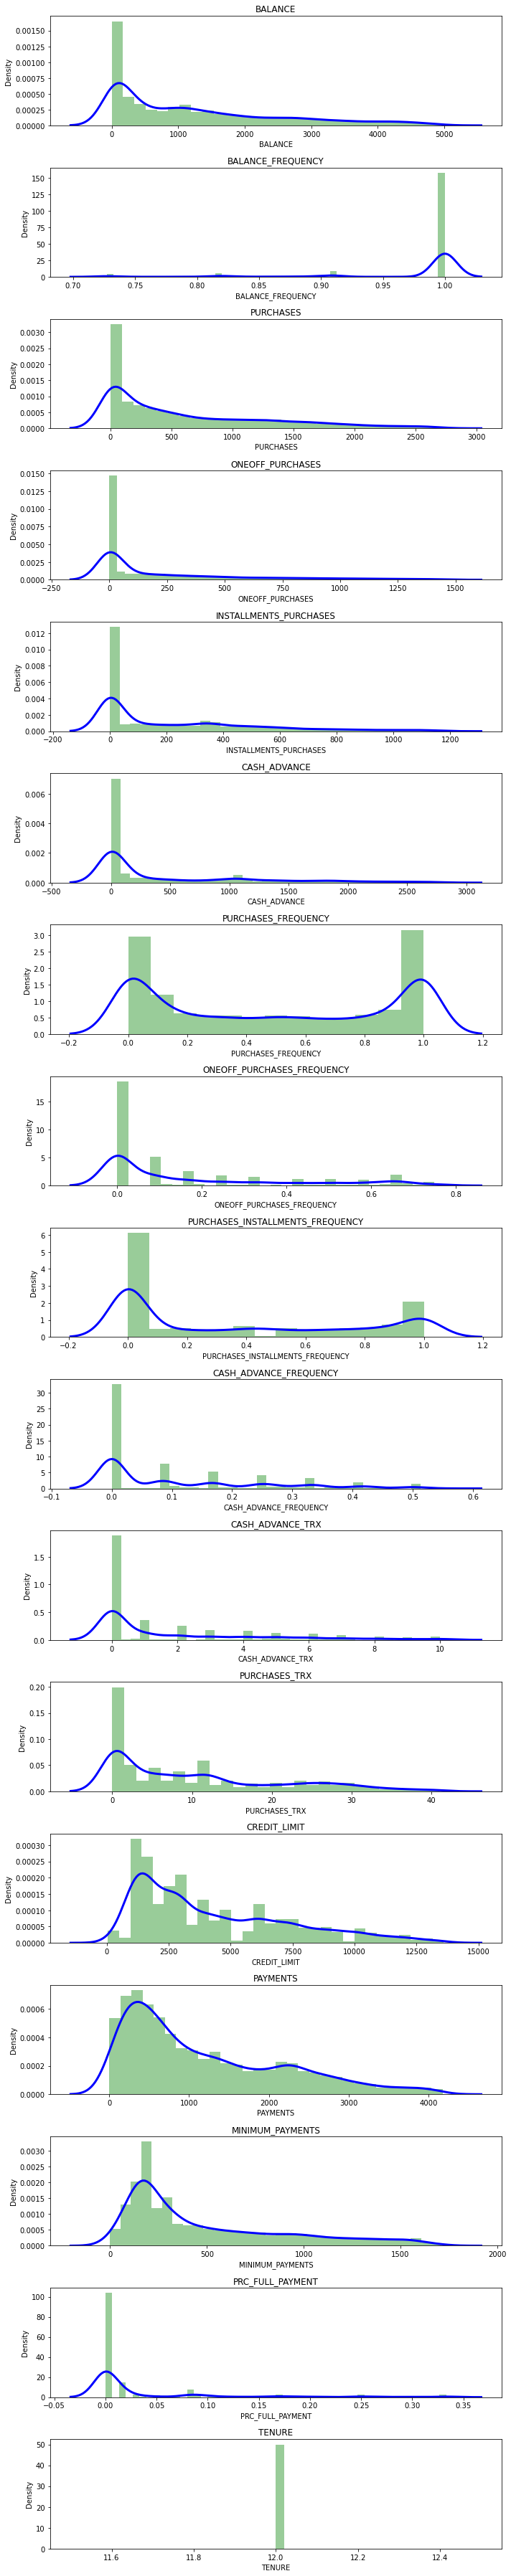

In [30]:

plt.figure(figsize=(10,50))
n=len(data_No_outlieres.columns)
for i in range(n) :
  plt.subplot(n,1,i+1)
  sns.distplot(data_No_outlieres[data_No_outlieres.columns[i]],kde_kws={"color":"b","lw" : 3, "label":"KDE" } , hist_kws={"color":"g"} )
  plt.title(data_No_outlieres.columns[i])
  plt.tight_layout()
  #eso para imprimir en toda el espacio disponble 
plt.show()


CORRELATION


In [31]:
corr_values = data_No_outlieres.corr()

# Simplify by emptying all the data below the diagonal

#np.tril_indices_from ->Return the indices for the lower-triangle of arr
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [32]:
corr_values.sort_values(by='abs_correlation',ascending=False).query('abs_correlation > 0.65')

,feature1,feature2,correlation,abs_correlation
76,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,0.862934,0.862934
99,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,0.840240,0.840240
13,BALANCE,MINIMUM_PAYMENTS,0.828652,0.828652
79,PURCHASES_FREQUENCY,PURCHASES_TRX,0.828415,0.828415
57,INSTALLMENTS_PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY,0.762335,0.762335
37,PURCHASES,PURCHASES_TRX,0.760002,0.760002
69,CASH_ADVANCE,CASH_ADVANCE_TRX,0.739285,0.739285
94,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,0.713273,0.713273
68,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,0.689519,0.689519
55,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,0.684482,0.684482


As we can see there are highly correlated variables, we not drop now nothing


And an examination of the skew values in anticipation of transformations.

In [33]:
skew_columns=data_No_outlieres.skew().sort_values(ascending=False)
skew_columns=skew_columns.loc[skew_columns>0.75]
skew_columns


PRC_FULL_PAYMENT              2.676390
ONEOFF_PURCHASES              1.632346
CASH_ADVANCE                  1.513526
CASH_ADVANCE_TRX              1.485422
INSTALLMENTS_PURCHASES        1.269659
CASH_ADVANCE_FREQUENCY        1.203535
ONEOFF_PURCHASES_FREQUENCY    1.185751
MINIMUM_PAYMENTS              1.107873
PURCHASES                     1.102360
BALANCE                       1.029143
PAYMENTS                      0.925305
PURCHASES_TRX                 0.915988
CREDIT_LIMIT                  0.906081
dtype: float64

In [35]:
for i in skew_columns.index.to_list():
    data_No_outlieres[i]= np.log1p(data_No_outlieres[i])

In [47]:
for i in skew_columns.index.to_list():
    data_No_outlieres[i]= np.exp(data_No_outlieres[i])

In [48]:
data_No_outlieres.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.0
mean,1234.478479,0.977871,614.634899,231.756709,225.587014,455.098212,0.490351,1.169219,0.364437,1.105120,2.761274,11.404715,4284.925428,1191.166445,488.977351,1.031493,12.0
std,1270.230476,0.060313,673.367968,345.302791,285.199558,700.643915,0.401371,0.227226,0.397448,0.140780,2.585049,10.758171,3103.557615,997.230962,420.713422,0.070101,0.0
min,1.000000,0.727273,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,51.000000,1.000000,1.019163,1.000000,12.0
25%,129.281915,1.000000,40.550000,1.000000,1.000000,1.000000,0.083333,1.000000,0.000000,1.000000,1.000000,2.000000,1601.000000,384.276166,171.803012,1.000000,12.0
50%,869.532619,1.000000,361.000000,27.750000,90.000000,1.000000,0.500000,1.083333,0.166667,1.000000,1.000000,8.000000,3001.000000,857.127279,313.343947,1.000000,12.0
75%,1947.311892,1.000000,1027.822500,357.760000,376.839500,832.566156,0.916667,1.271212,0.750000,1.166667,4.000000,18.000000,6296.000000,1874.217623,735.347015,1.016667,12.0
max,4941.113918,1.000000,2712.900000,1444.330000,1171.490000,2785.294727,1.000000,1.750000,1.000000,1.545455,11.000000,42.000000,13601.000000,4178.324826,1713.713459,1.333333,12.0


#  K-mean AND ELBOW  METHODE

- MUST SCALE DATA 
- WORK VERY GOOD WITHOUT OUTLIERS(DATA->DATA_NO_OUTLIERS)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler();
data_scaled= scaler.fit_transform(data_No_outlieres)

In [50]:
pd.DataFrame(data=data_scaled,columns=data_No_outlieres.columns)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.938920,-2.647827,-0.769659,-0.668311,-0.452996,-0.648152,-0.806490,-0.744761,-0.707313,-0.746741,-0.681369,-0.781284,-1.058176,-0.991164,-0.828324,-0.449271,0.0
1,1.550190,-1.140453,-0.911343,-0.668311,-0.787517,0.876427,-1.221758,-0.744761,-0.916995,1.029178,0.866077,-0.967199,0.875198,2.921118,1.389058,2.720923,0.0
2,0.993316,0.366920,0.236934,1.570922,-0.787517,-0.648152,1.269843,2.115991,-0.916995,-0.746741,-0.681369,0.148294,1.036312,-0.569709,0.331140,-0.449271,0.0
3,0.341053,0.065446,1.314904,0.229265,-0.787517,-0.354423,-1.014125,-0.378000,-0.916995,-0.154771,-0.294507,-0.874242,1.036312,-1.193538,-0.417489,-0.449271,0.0
4,-0.327332,0.366920,-0.887581,-0.621972,-0.787517,-0.648152,-1.014125,-0.378000,-0.916995,-0.746741,-0.681369,-0.874242,-0.993730,-0.513282,-0.578065,-0.449271,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.948688,0.366920,-0.478985,-0.668311,0.233299,-0.648152,1.269843,-0.744761,1.179833,-0.746741,-0.681369,-0.409453,-1.058176,-0.867021,-1.043740,-0.211507,0.0
8946,-0.956018,0.366920,-0.465796,-0.668311,0.264437,-0.648152,1.269843,-0.744761,1.179833,-0.746741,-0.681369,-0.409453,-1.058176,-0.916895,-0.417489,-0.449271,0.0
8947,-0.952699,-2.396606,-0.696887,-0.668311,-0.281177,-0.648152,0.854576,-0.744761,0.760469,-0.746741,-0.681369,-0.502410,-1.058176,-1.112037,-0.964033,3.117201,0.0
8948,-0.960526,-2.396606,-0.911343,-0.668311,-0.787517,-0.595970,-1.221758,-0.744761,-0.916995,0.437207,0.092354,-0.967199,-1.219290,-1.140839,-1.027412,3.117201,0.0


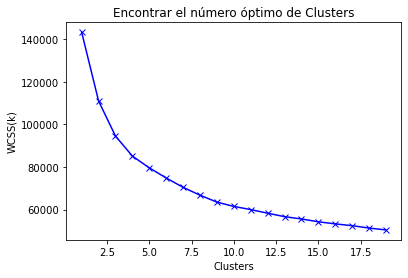

In [51]:

inertia= []
# range for K
range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_) 

#bx b color blue , x en cada punto de observaciones - para unir
plt.plot(range_values, inertia, 'bx-')
plt.title("Encontrar el número óptimo de Clusters")
plt.xlabel("Clusters")
plt.ylabel("WCSS(k)")
plt.show()



# With the graph we can see that in 4 o 5 clusters is where the elbow of the curve is formed.
# However, the values are not reduced to a linear form until the 8th cluster. 
# Let's choose a number of clusters equal to 4.



APPLICATION **OF** **ALGORITHM** KMEANS

In [61]:

kmeans=KMeans(4);
kmeans.fit(data_scaled);
labels=kmeans.labels_
labels

array([3, 0, 2, ..., 1, 3, 2])

In [62]:
kmeans.cluster_centers_.shape
#labels.max()

(4, 17)

In [63]:
# let's see well the ceintroids of each cluster next to the columns
clusters=pd.DataFrame(data=kmeans.cluster_centers_,columns=data_No_outlieres.columns)
clusters


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.852305,0.021774,-0.653368,-0.398348,-0.604118,1.185516,-0.841701,-0.478809,-0.694463,1.258005,1.250532,-0.714312,0.226100,0.243408,0.729367,-0.129682,0.0
1,-0.596437,-0.175196,0.031620,-0.509535,0.797081,-0.527317,0.912443,-0.557514,1.115232,-0.598365,-0.542884,0.356575,-0.404820,-0.402505,-0.395907,0.195754,0.0
2,0.258410,0.098670,1.323645,1.063153,0.690545,-0.209008,0.955098,1.352557,0.599222,-0.243627,-0.246815,1.275821,0.599299,0.795117,0.166645,0.071975,0.0
3,-0.429888,0.031614,-0.529917,-0.145518,-0.624828,-0.377917,-0.725574,-0.270520,-0.710234,-0.357033,-0.387980,-0.675800,-0.344617,-0.508716,-0.407066,-0.093398,0.0


 __To better understand these values, we will apply the inverse transformation.__
 
 

In [93]:

cluster_center= scaler.inverse_transform(clusters)

cluster_center= pd.DataFrame(data=cluster_center,columns=data_No_outlieres.columns)
cluster_center



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2317.042122,0.979184,174.702437,94.213794,53.302419,1285.676434,0.152535,1.060428,0.088440,1.282212,5.993779,3.720452,4986.599063,1433.887341,795.814574,1.022402,12.0
1,476.908266,0.967305,635.925608,55.822737,452.901461,85.657734,0.856558,1.042545,0.807659,1.020887,1.357970,15.240595,3028.612077,789.798783,322.423459,1.045215,12.0
2,1562.700683,0.983822,1505.885020,598.845868,422.519005,308.666396,0.873678,1.476538,0.602584,1.070825,2.123281,25.129445,6144.779904,1984.037068,559.083347,1.036538,12.0
3,688.452037,0.979778,257.825652,181.511842,47.396209,190.328011,0.199142,1.107754,0.082172,1.054860,1.758382,4.134754,3215.446672,683.886974,317.728979,1.024946,12.0


__At first glance you can deduce that:__
- First Customer Cluster : the customers whith  lowest balance ($476) and cash advance ($85) and lurative because installments_purcharse (452) nad credit_limit=3029 


- Secound Customer Cluster : who use a credit card as a loan (most lucrative sector): balance ($ 1562) y cash_Advance ( $ 308)
- Third Customer Clusters: balance higher $2317 with low percentage of purchase and high advance of cashadvance
- fourth Customer Clusters:with low porcentage of installments_purchase 

In [65]:

predict= kmeans.fit_predict(data_scaled)
predict


array([3, 1, 0, ..., 2, 3, 0])

In [66]:

data_cluster= data_No_outlieres

data_cluster['kmeans'] = predict

In [70]:
data_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,kmeans
0,41.900749,0.818182,96.40,1.000,96.40,1.000000,0.166667,1.000000,0.083333,1.000000,1.0,3.0,1001.0,202.802084,140.509787,1.000000,12.0,3
1,3203.467416,0.909091,1.00,1.000,1.00,1069.127248,0.000000,1.000000,0.000000,1.250000,5.0,1.0,7001.0,4104.032597,1073.340217,1.222222,12.0,1
2,2496.148862,1.000000,774.17,774.170,1.00,1.000000,1.000000,1.650000,0.000000,1.000000,1.0,13.0,7501.0,623.066742,628.284787,1.000000,12.0,0
3,1667.670542,0.981818,1500.00,310.918,1.00,206.788017,0.083333,1.083333,0.000000,1.083333,2.0,2.0,7501.0,1.000000,313.343947,1.000000,12.0,3
4,818.714335,1.000000,17.00,17.000,1.00,1.000000,0.083333,1.083333,0.000000,1.000000,1.0,2.0,1201.0,679.334763,245.791237,1.000000,12.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,29.493517,1.000000,292.12,1.000,292.12,1.000000,1.000000,1.000000,0.833333,1.000000,1.0,7.0,1001.0,326.594462,49.886365,1.016667,12.0,2
8946,20.183215,1.000000,301.00,1.000,301.00,1.000000,1.000000,1.000000,0.833333,1.000000,1.0,7.0,1001.0,276.861322,313.343947,1.000000,12.0,2
8947,24.398673,0.833333,145.40,1.000,145.40,1.000000,0.833333,1.000000,0.666667,1.000000,1.0,6.0,1001.0,82.270775,83.418369,1.250000,12.0,2
8948,14.457564,0.833333,1.00,1.000,1.00,37.558778,0.000000,1.000000,0.000000,1.166667,3.0,1.0,501.0,53.549959,56.755628,1.250000,12.0,3


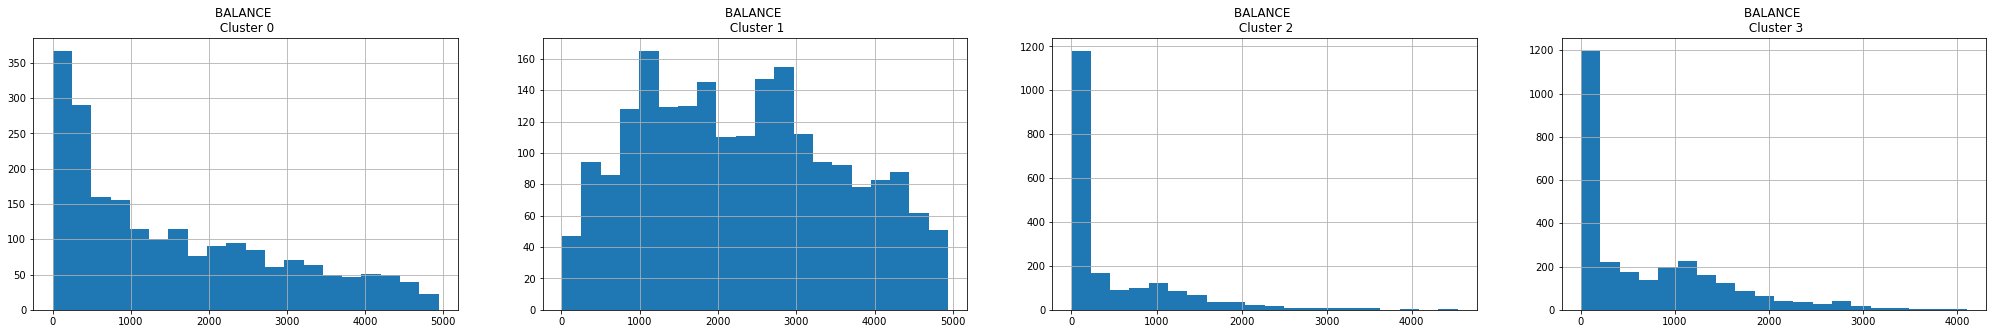

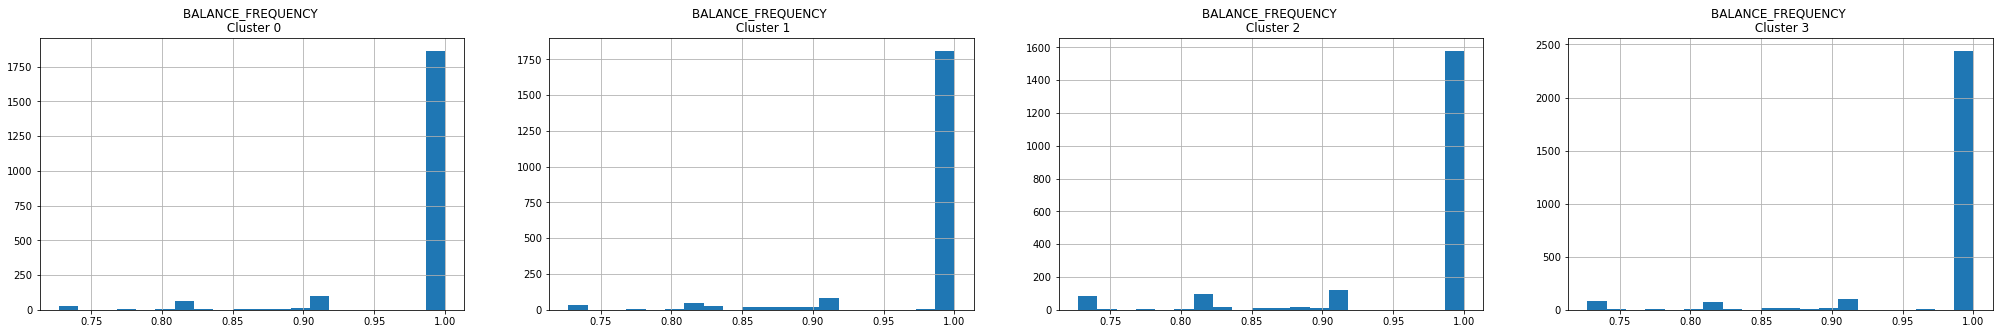

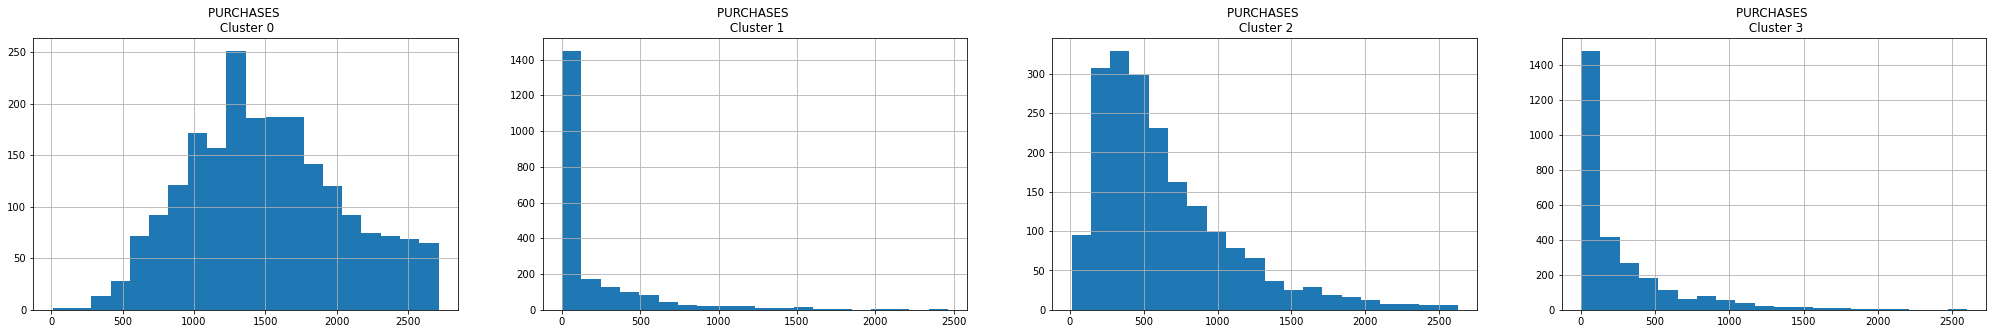

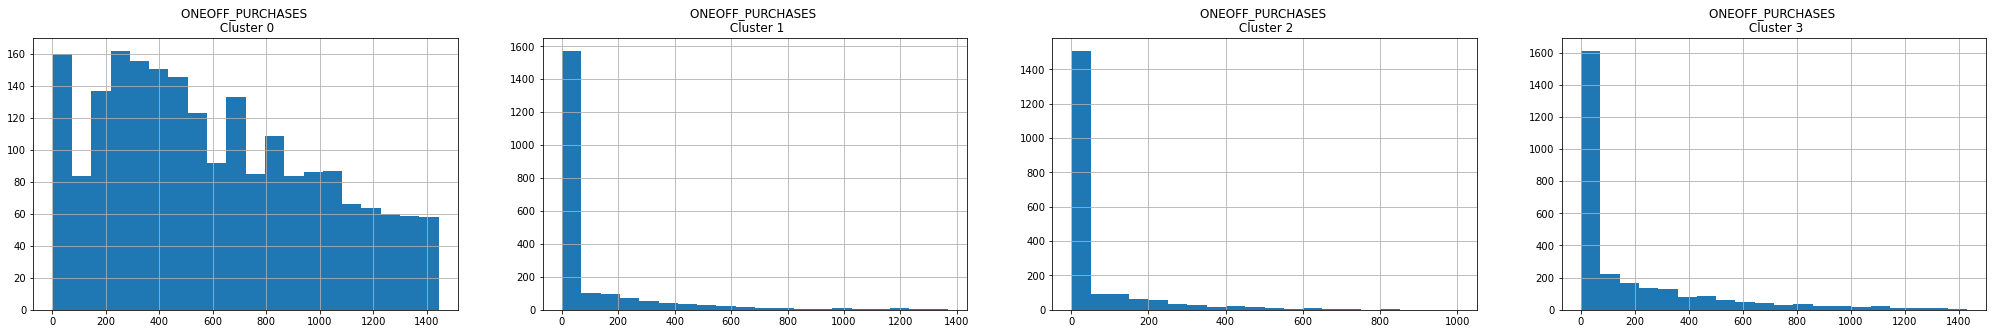

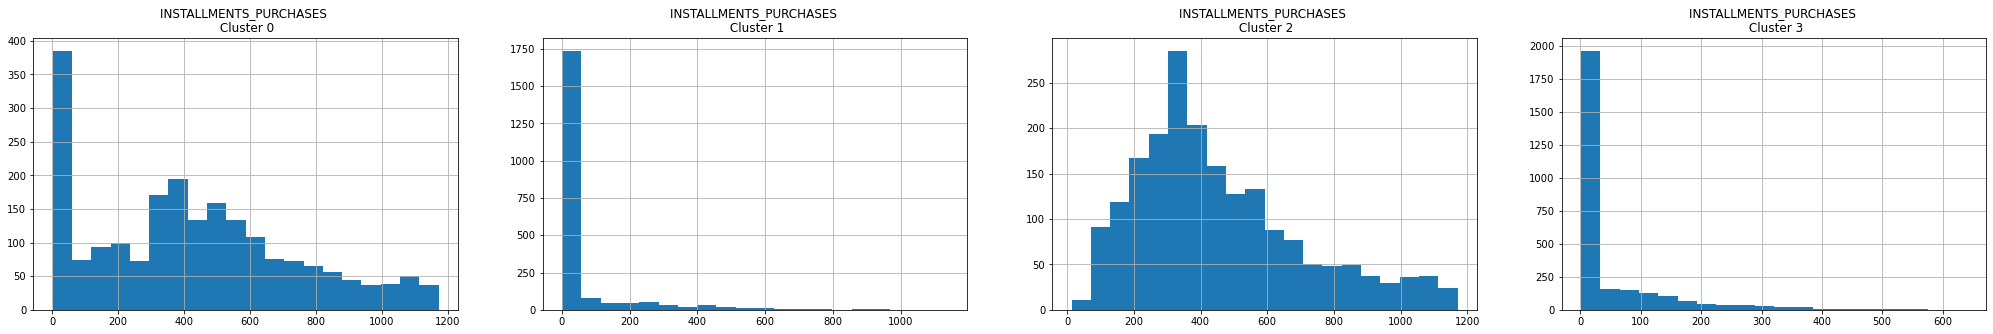

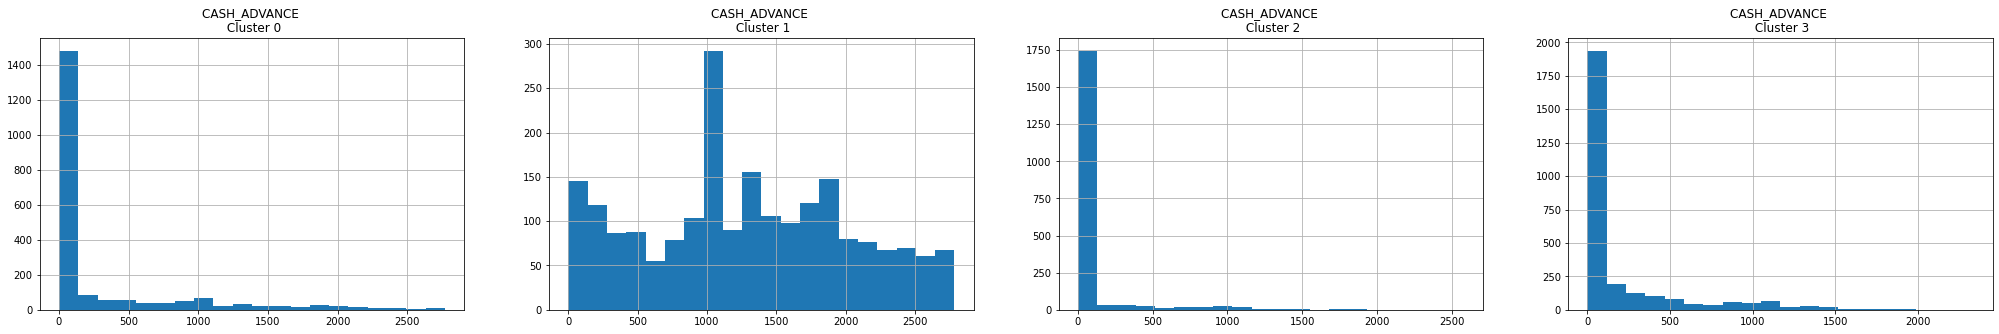

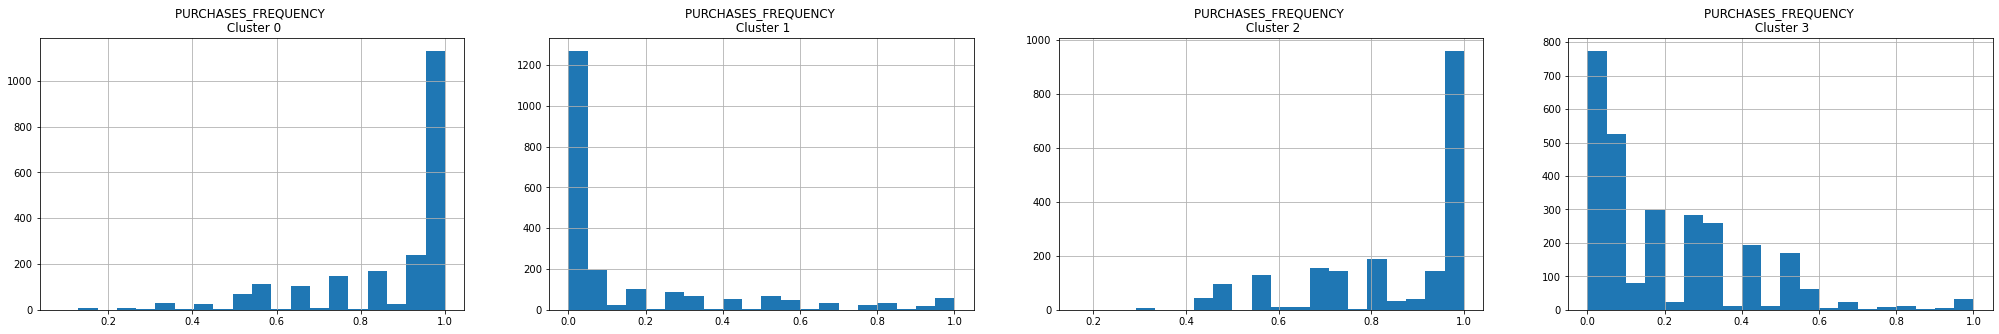

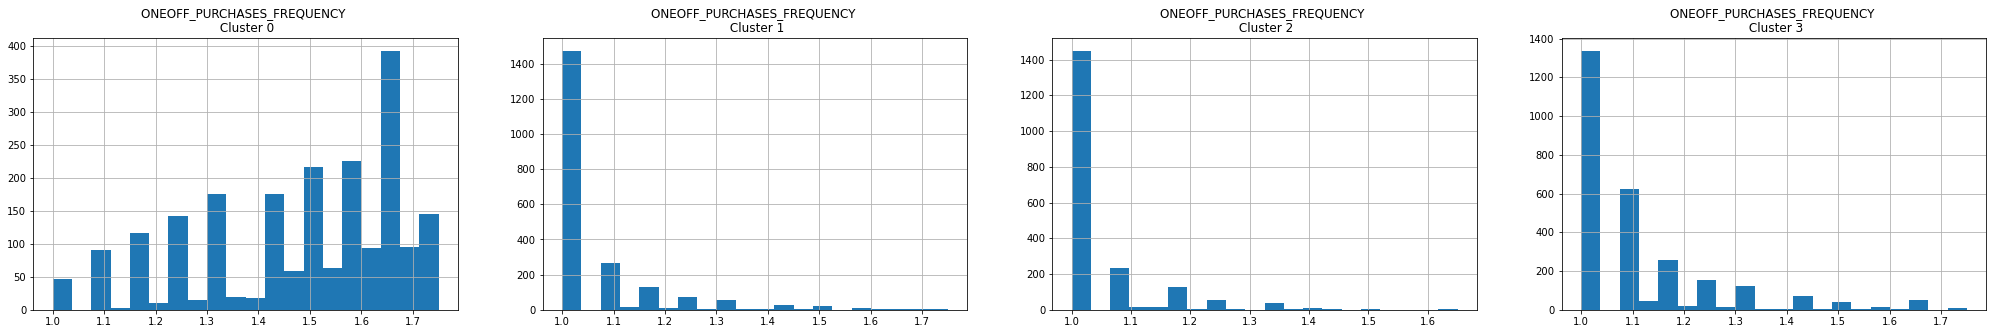

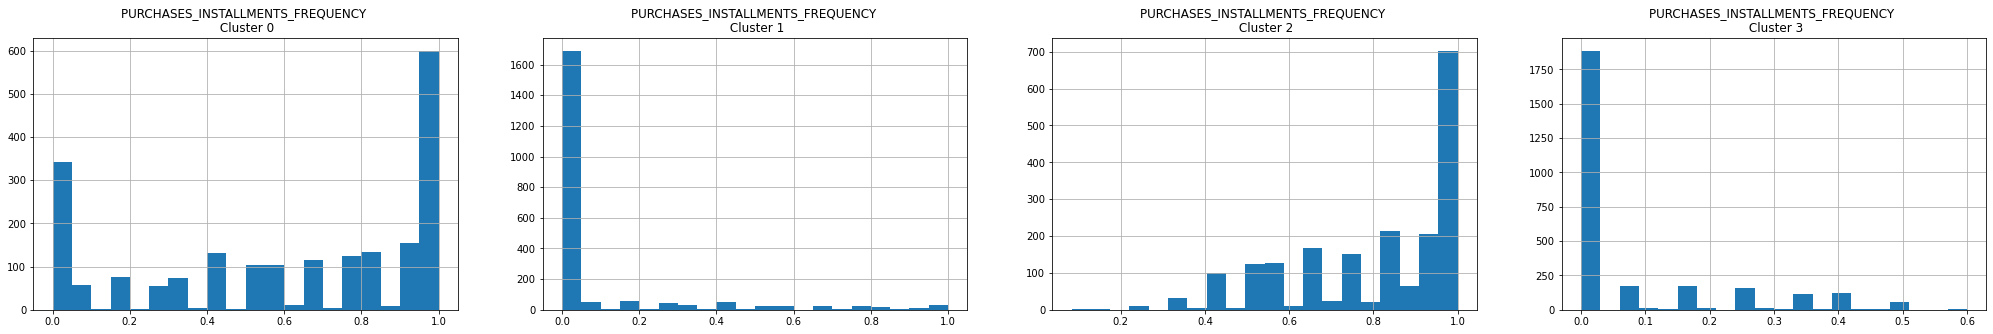

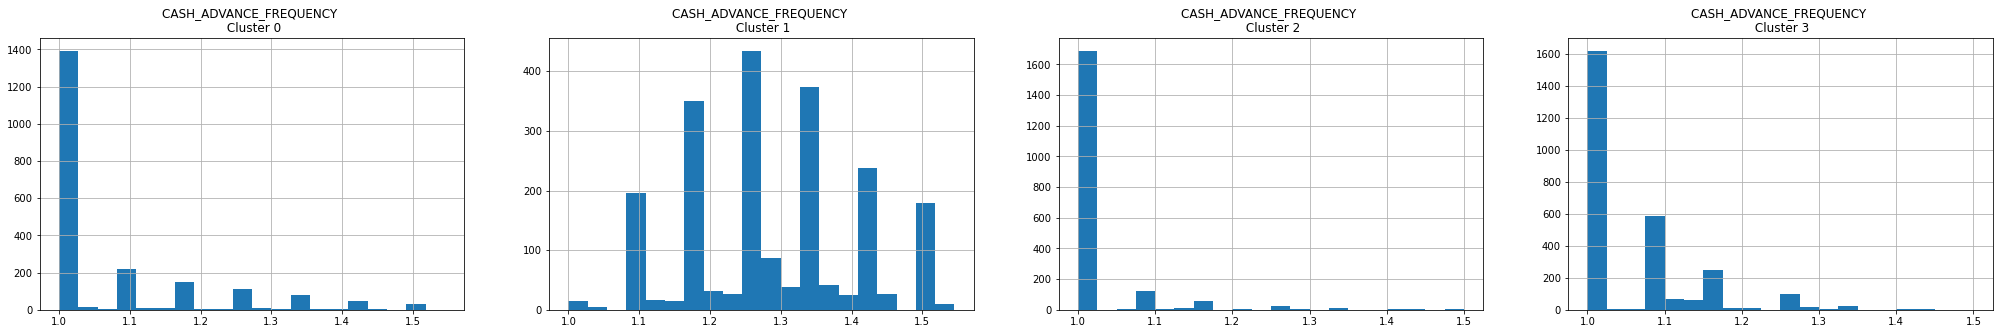

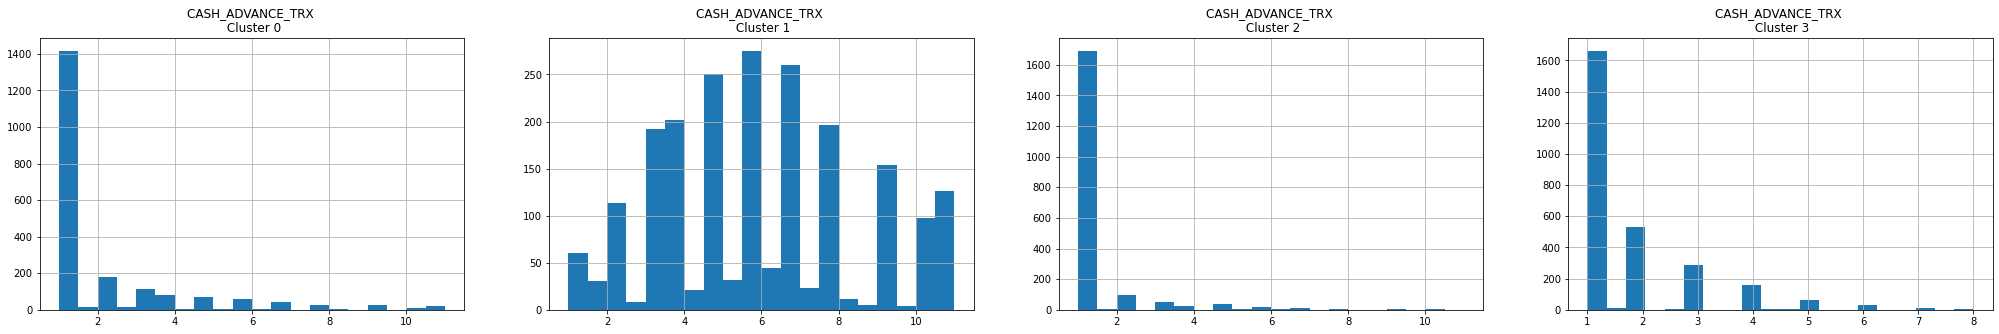

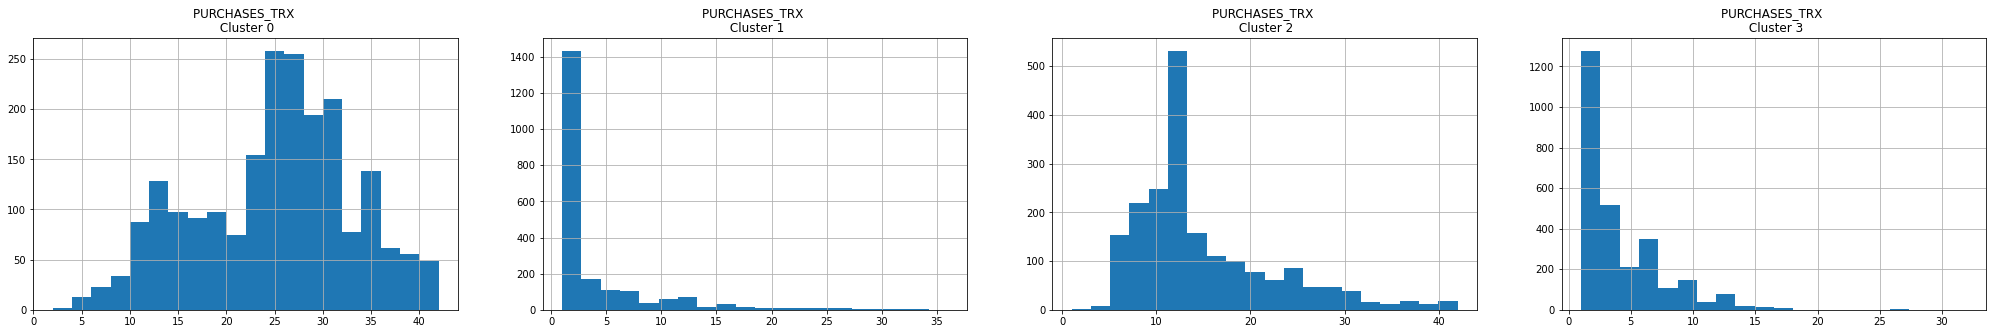

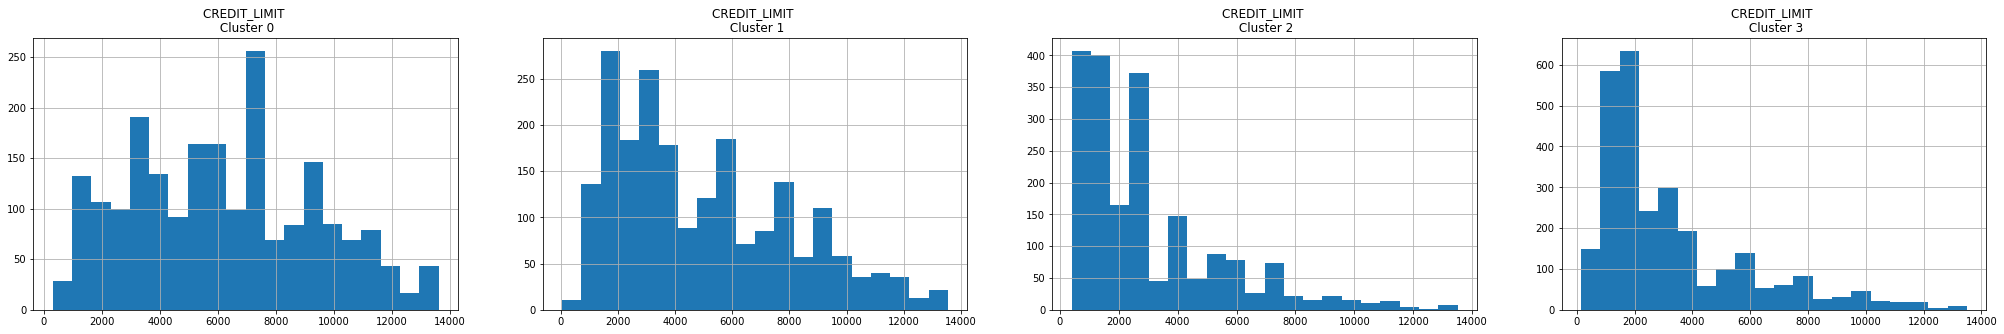

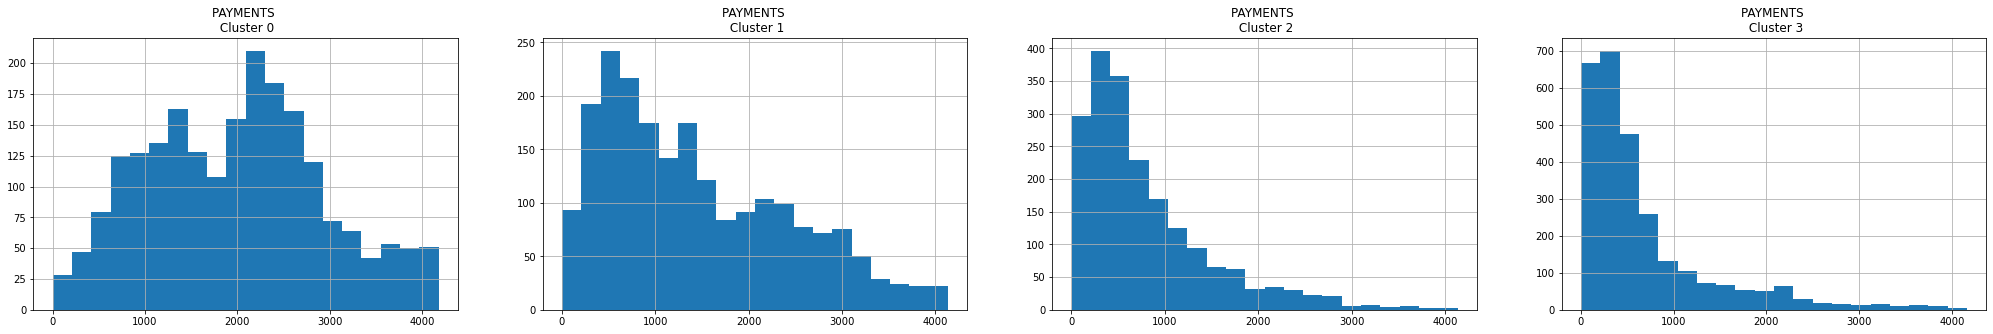

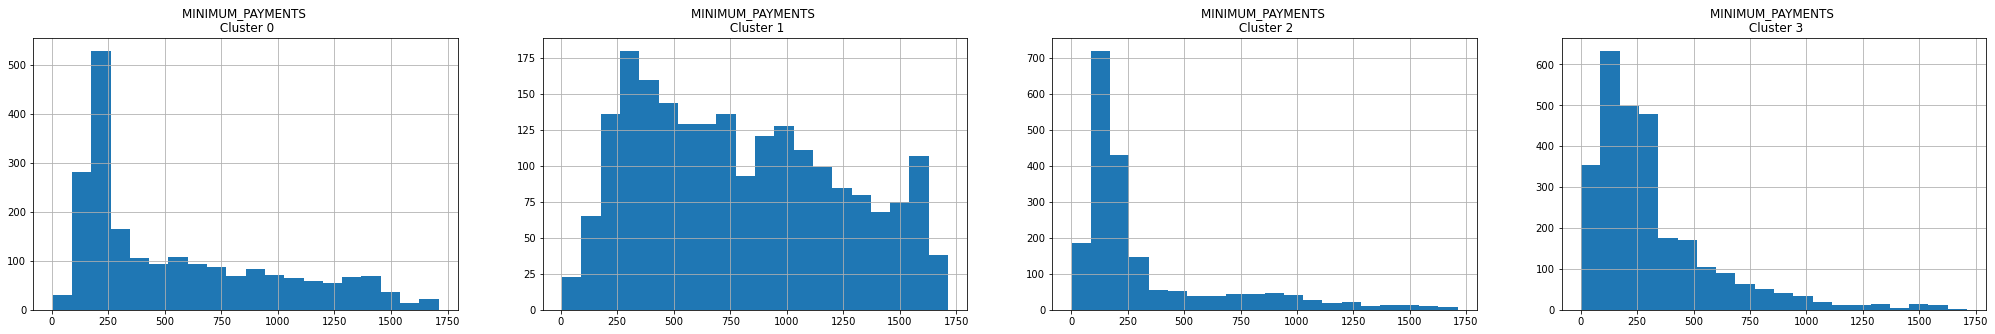

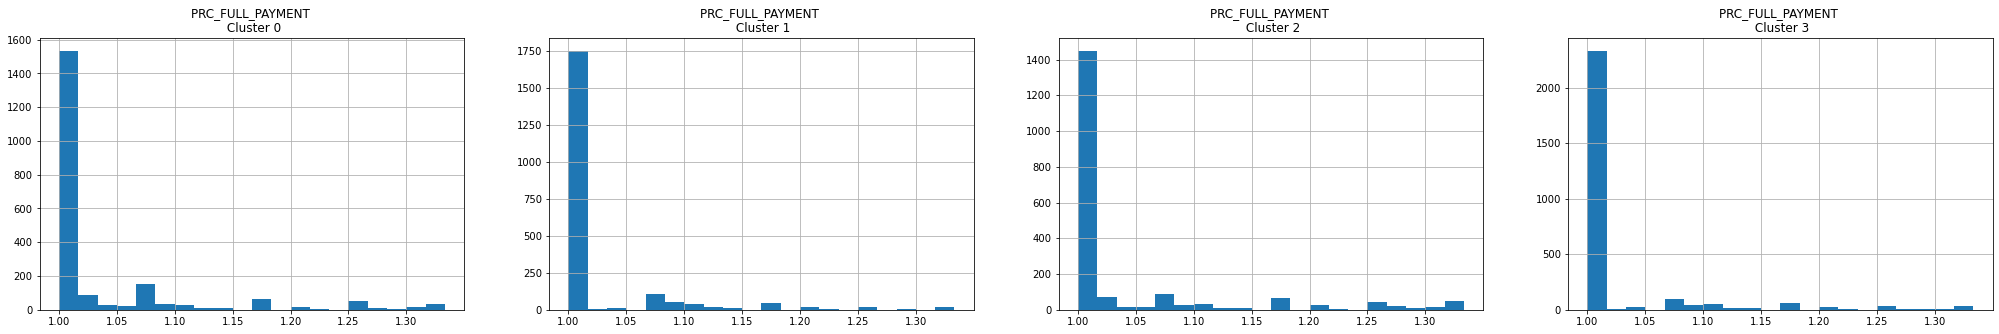

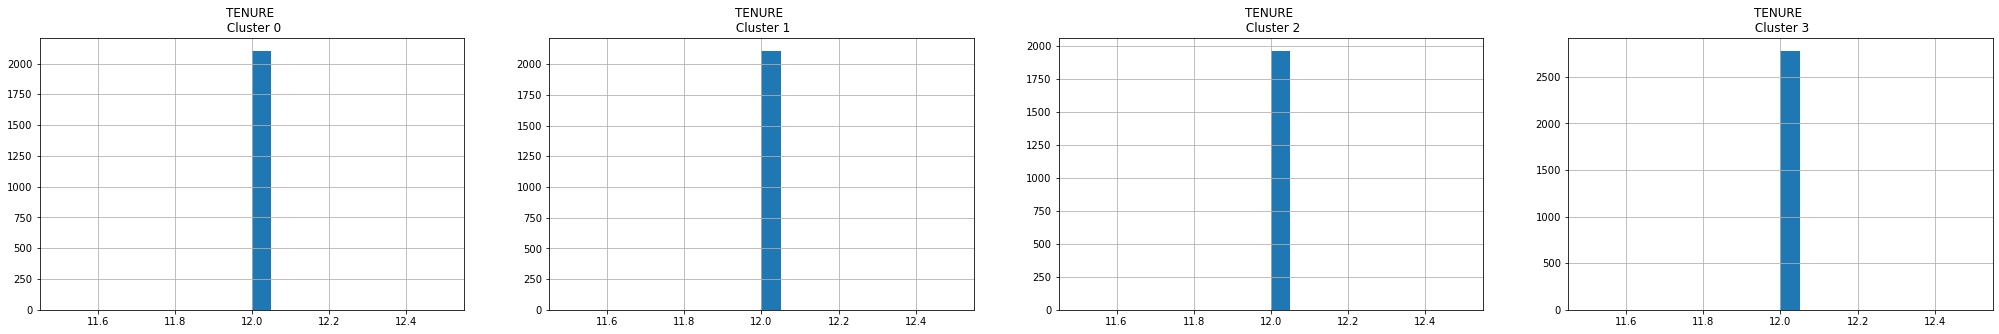

In [72]:
# WE WILL NOW SEE HOW EACH CLUSTER IS DISTRIBUTED ACCORDING TO EACH CHARACTERISTIC 
# WE WILL GET IN THE HIST HOW EACH FEATURE BEHAVES IN EACH CLUSTER  

for i in data.columns :
    plt.figure(figsize=(35,5))
    for j in range(4): 
        plt.subplot(1,4,j+1)
        cluster= data_cluster[data_cluster['kmeans'] ==j ]
        cluster[i].hist(bins=20)
        plt.title('{} \n Cluster {}'.format(i,j))
    plt.show()






## AgglomerativeClustering
* Fit an agglomerative clustering model with 4 clusters.
* Compare the results to those obtained by K-means .
* Visualize the dendrogram produced by agglomerative clustering. 

In [78]:
from sklearn.cluster import AgglomerativeClustering
### BEGIN SOLUTION
ag = AgglomerativeClustering(n_clusters=4, linkage='ward', compute_full_tree=True)
ag = ag.fit(data_scaled)
data_cluster['agglom'] = ag.fit_predict(data_scaled)

### Comparation between kmeans and AgglomerativeClustering

- It is seen that both algorithms have done a good job classifying the customers into 4 segments, but it is noted that agglomerative clustering ranks a little better than kmenas .

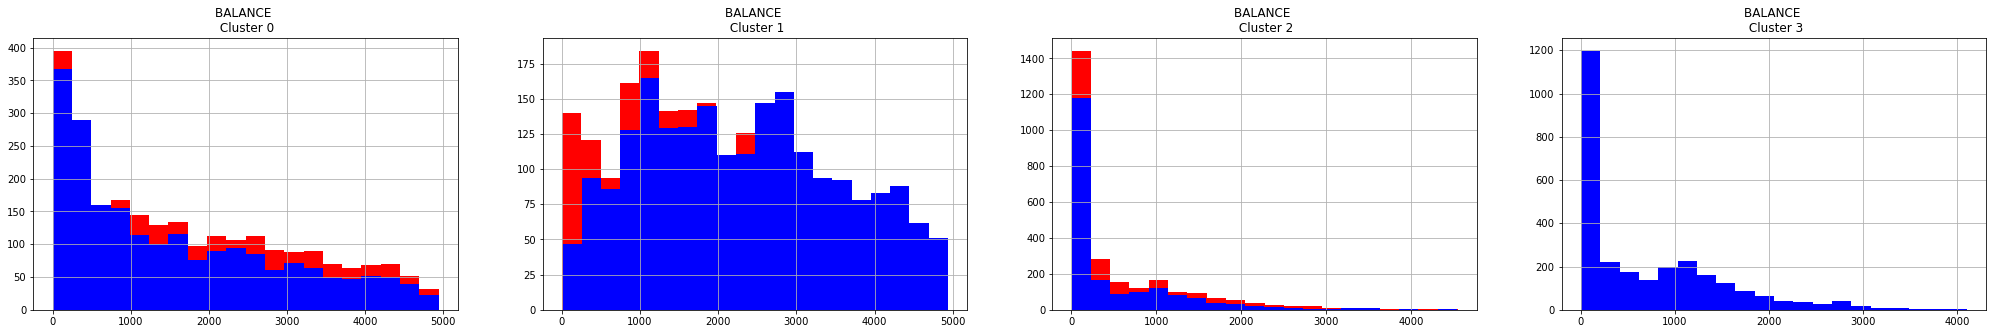

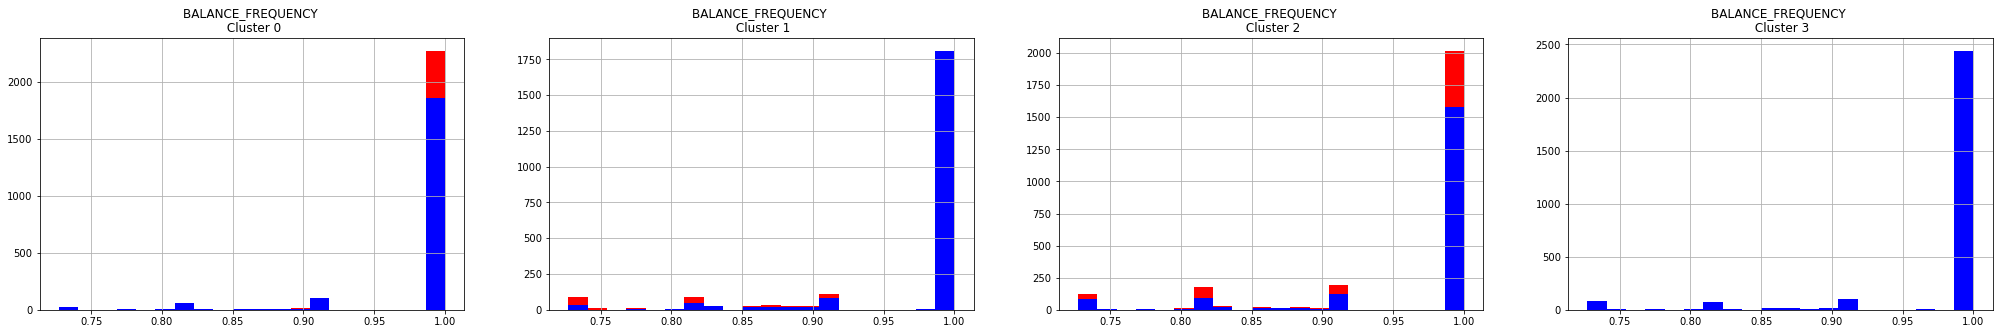

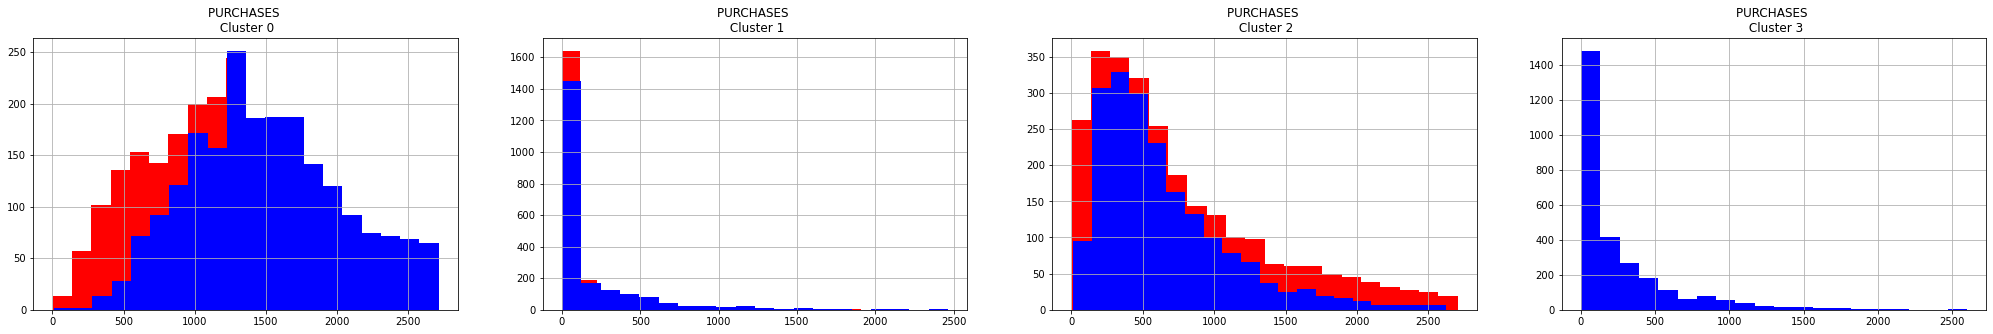

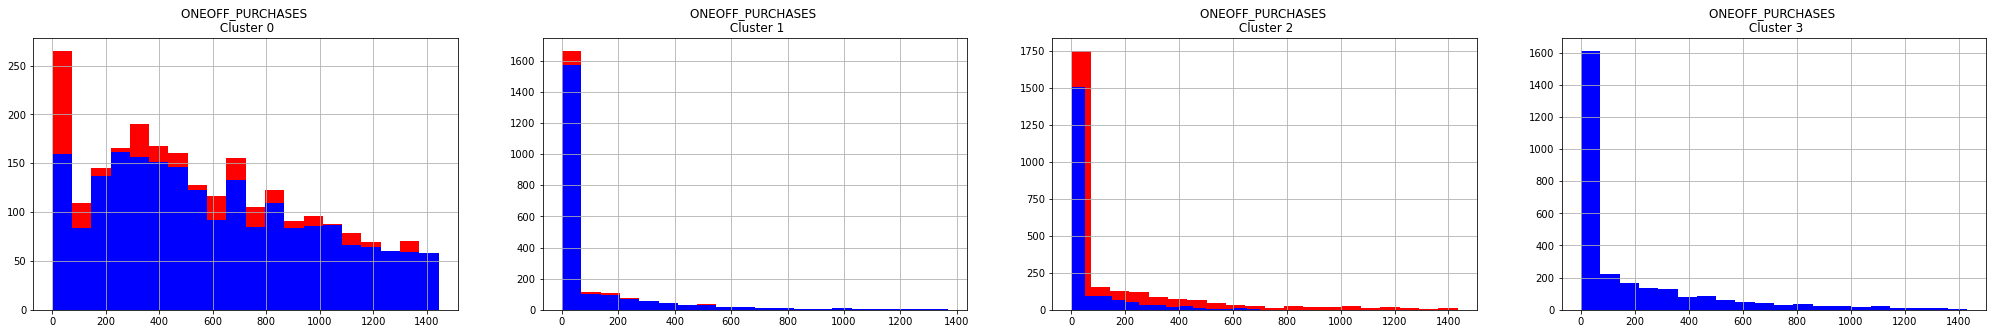

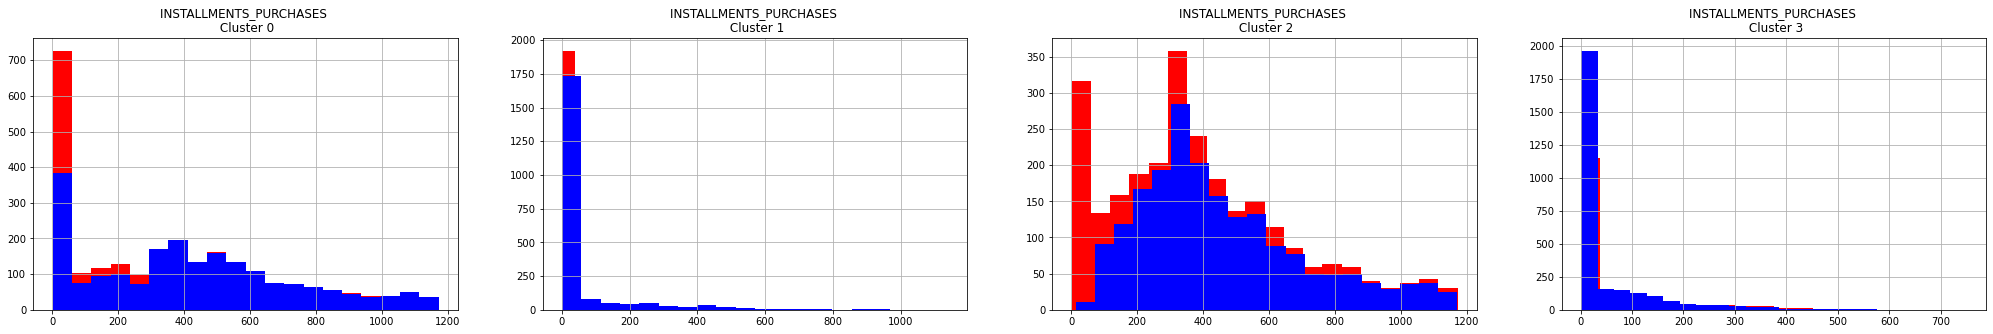

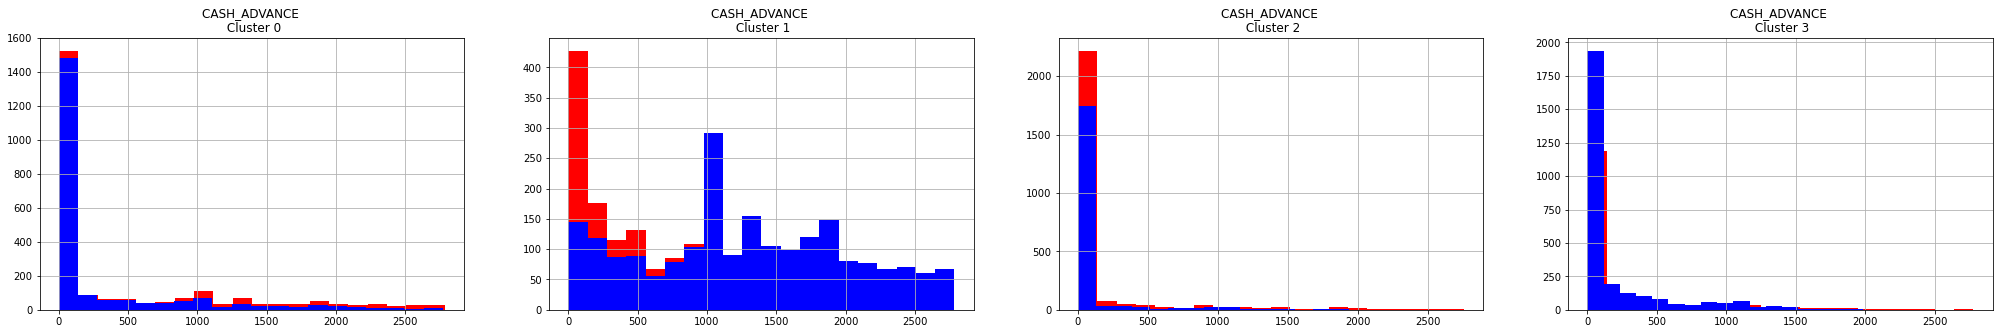

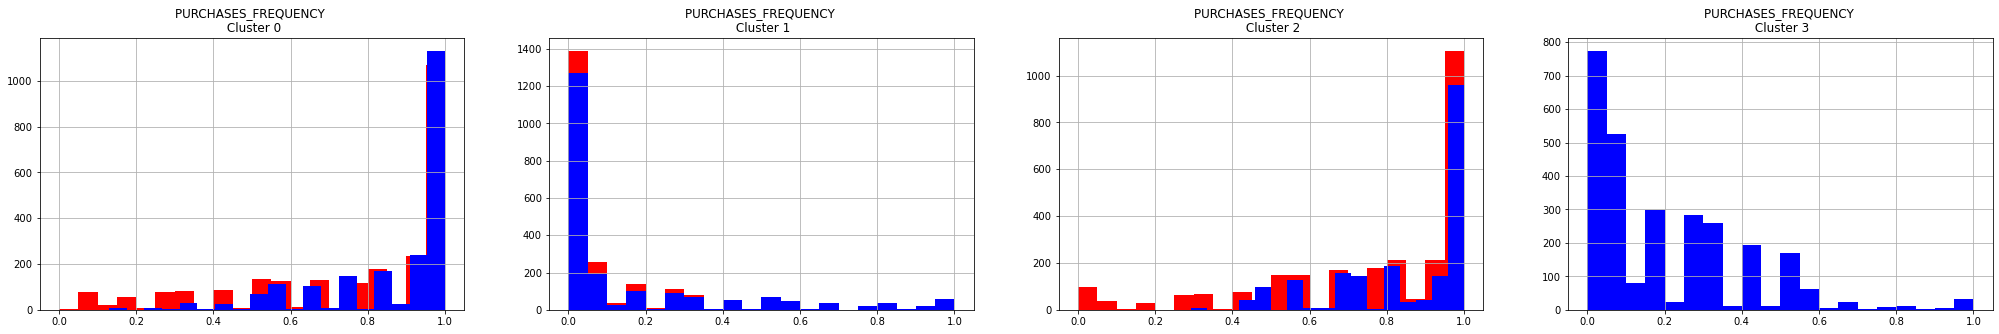

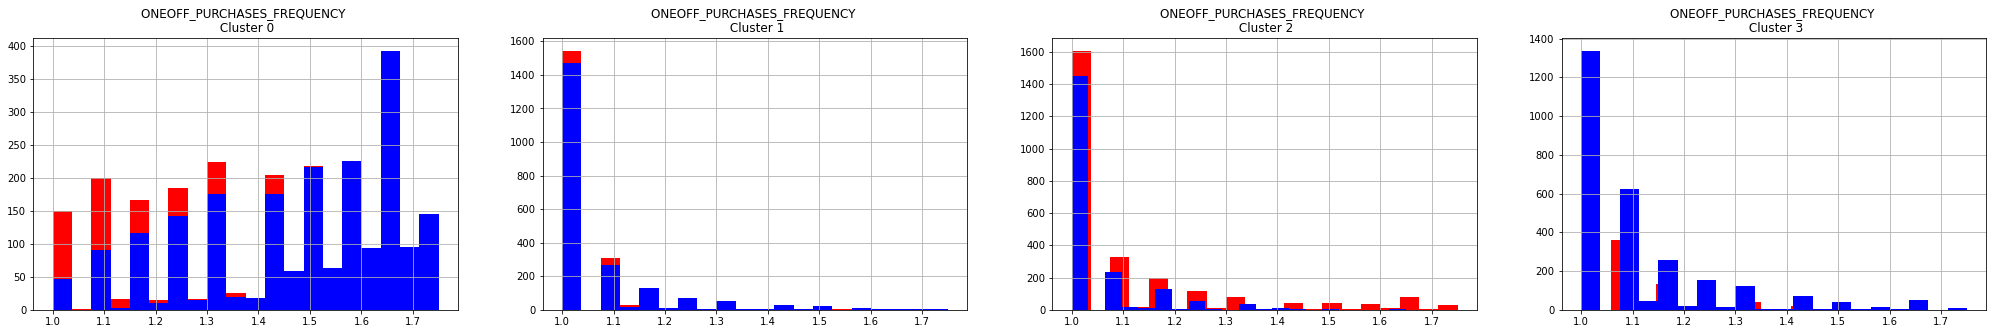

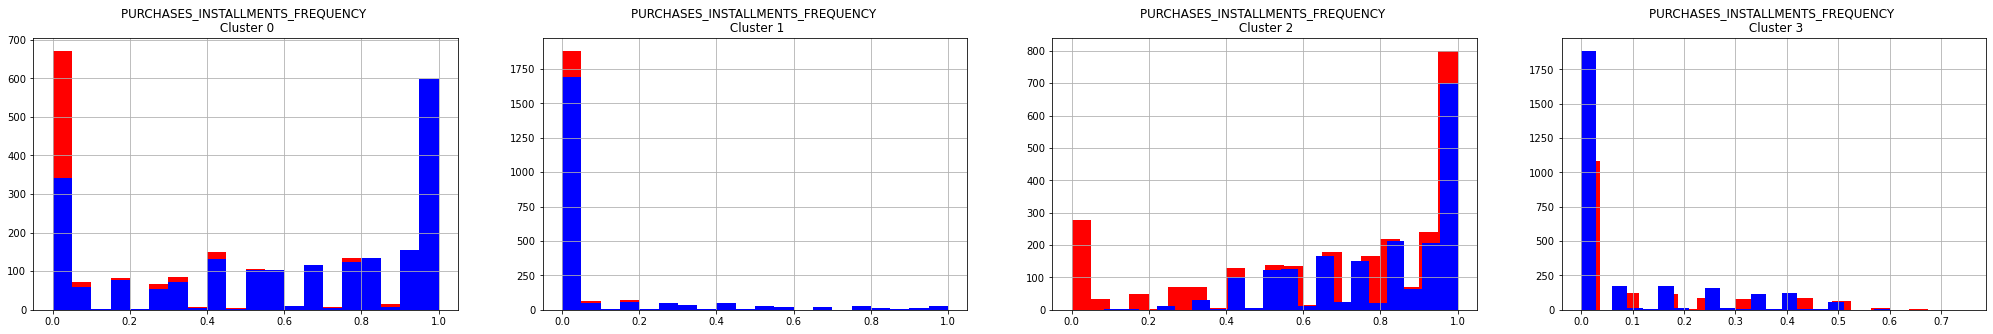

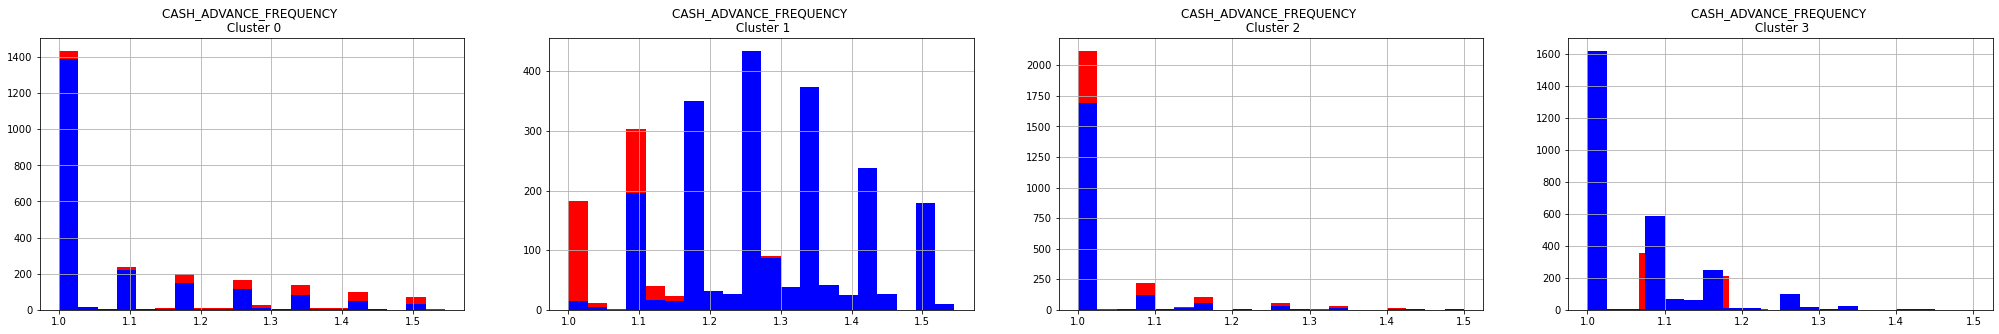

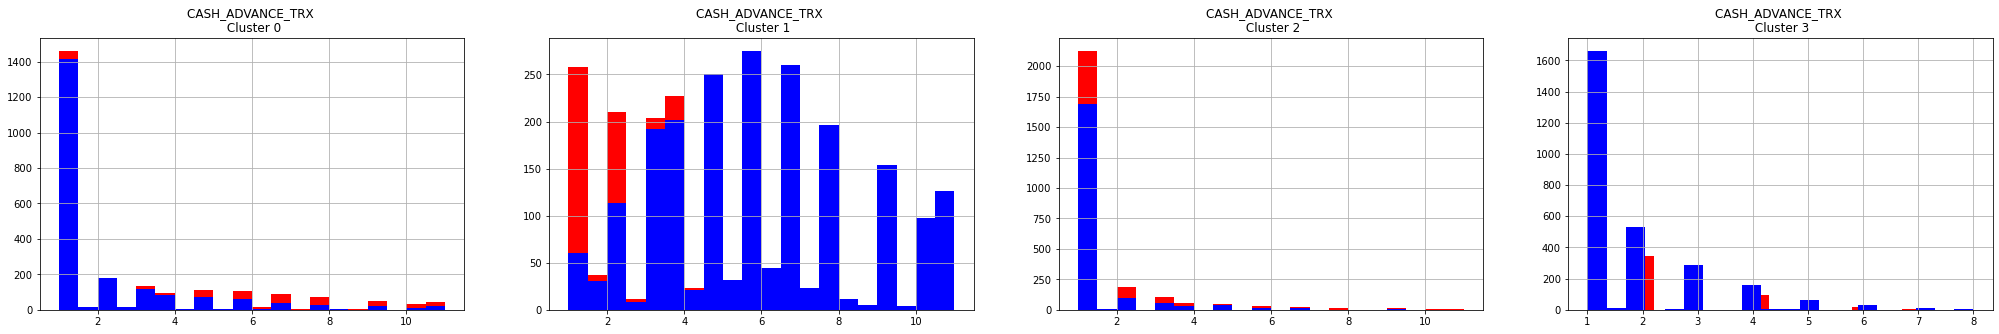

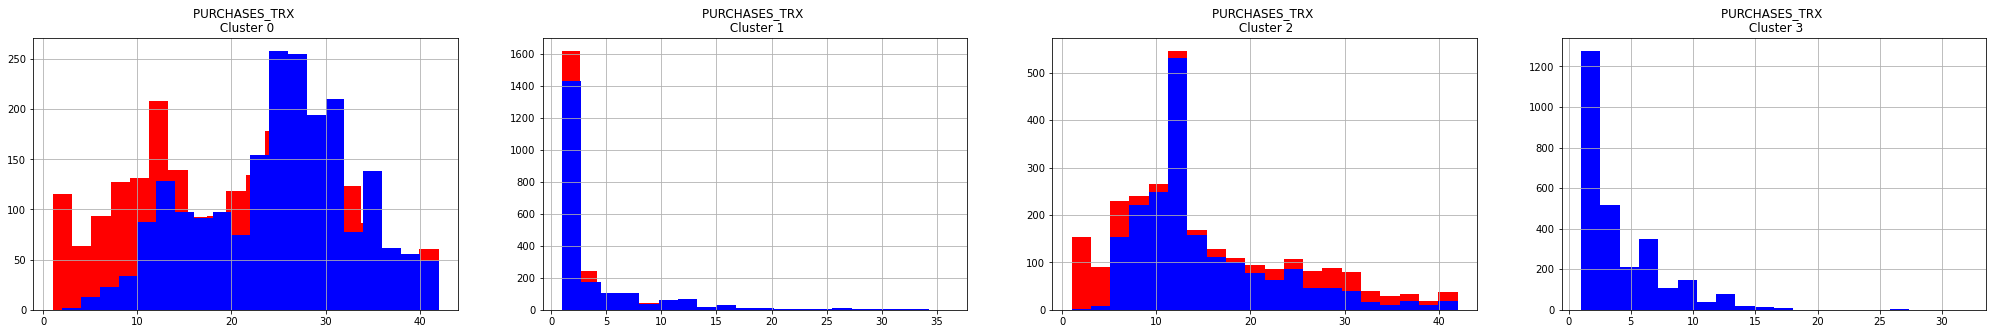

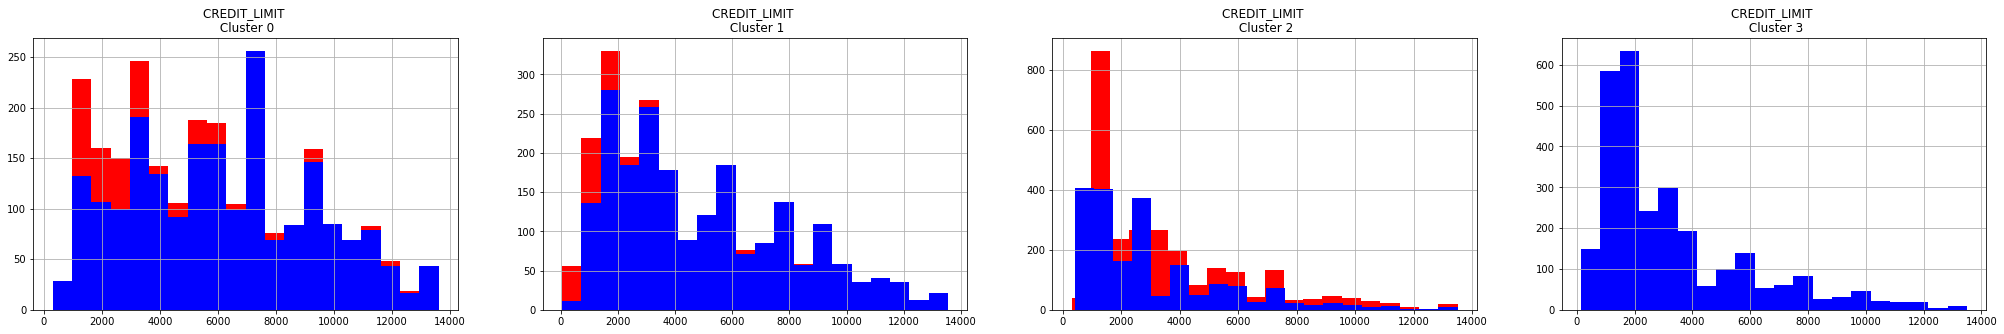

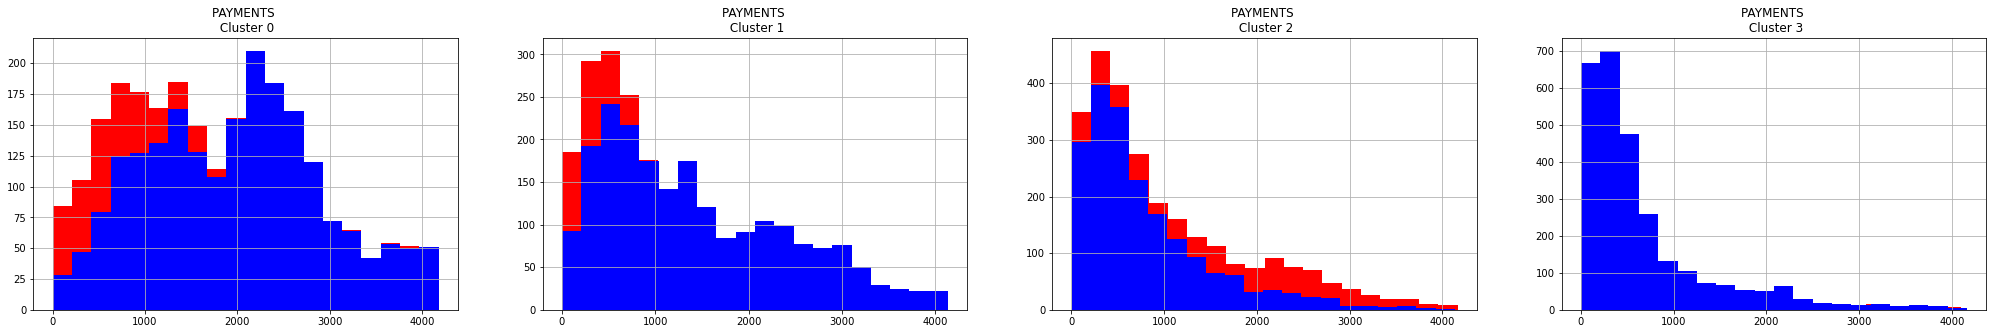

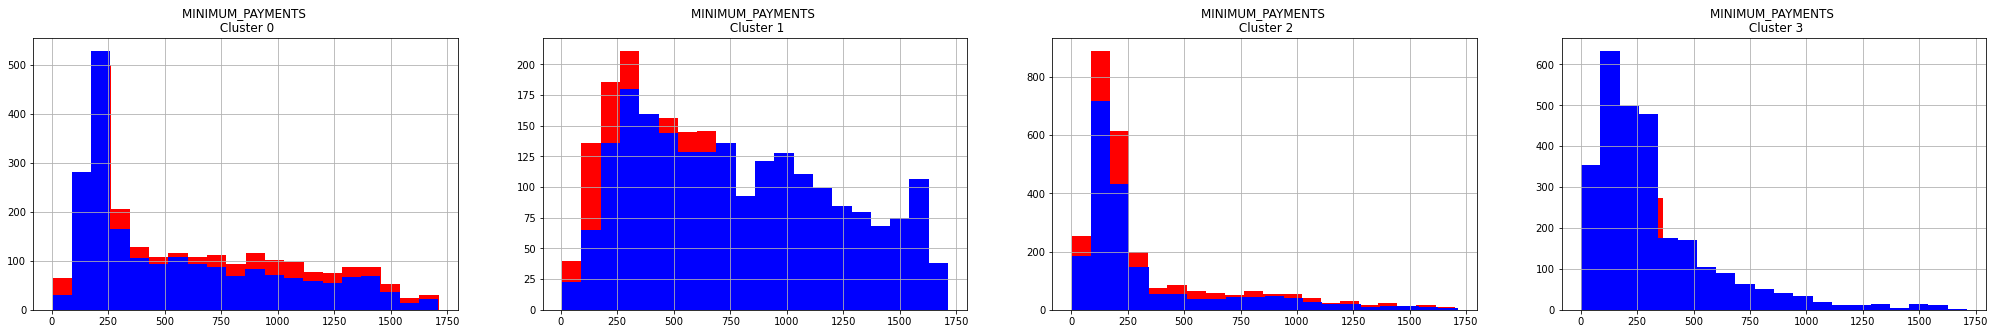

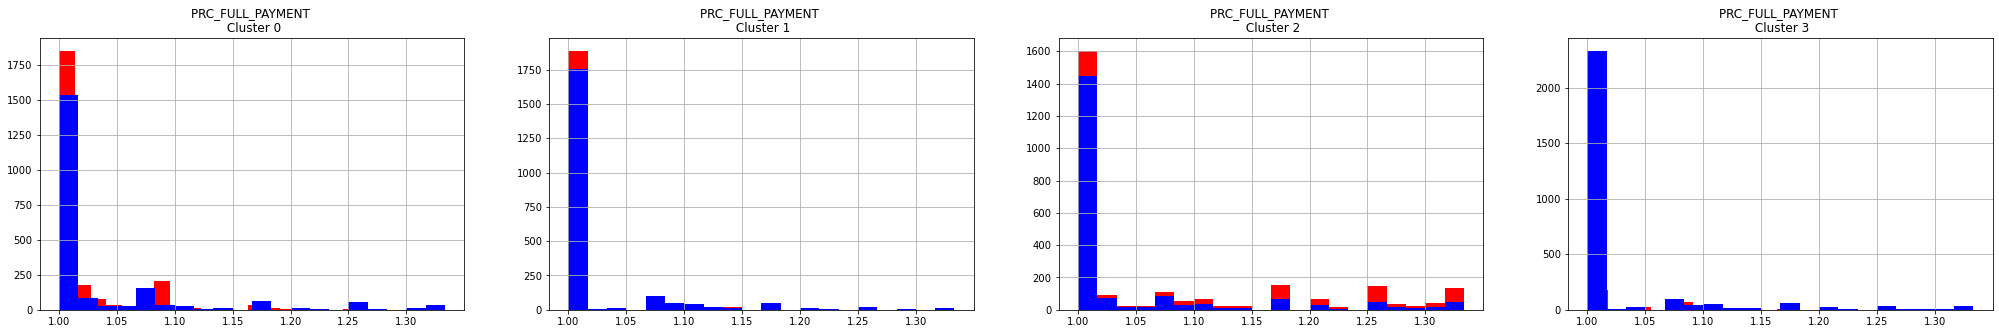

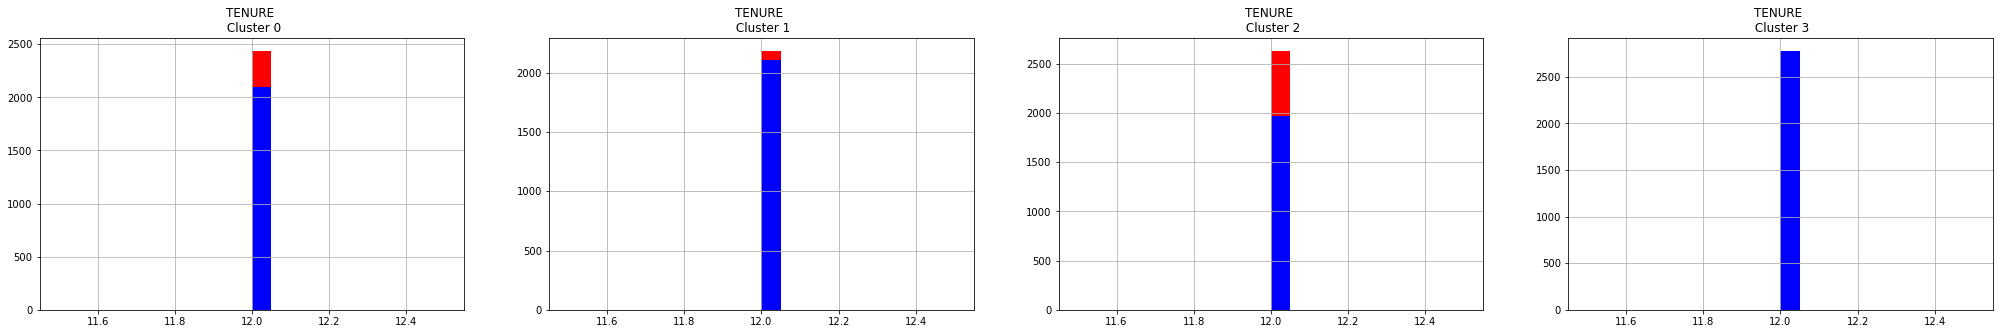

In [91]:
# First, for Agglomerative Clustering:
for i in data.columns :
    plt.figure(figsize=(35,5))
    for j in range(4): 
        plt.subplot(1,4,j+1)
        cluster= data_cluster[data_cluster['agglom'] ==j ]
        cluster2= data_cluster[data_cluster['kmeans'] ==j ]
        cluster[i].hist(bins=20,color='red')
        cluster2[i].hist(bins=20,color='blue')
        plt.title('{} \n Cluster {}'.format(i,j))
    plt.show()

### The Dendrogram produced by agglomerative clustering.

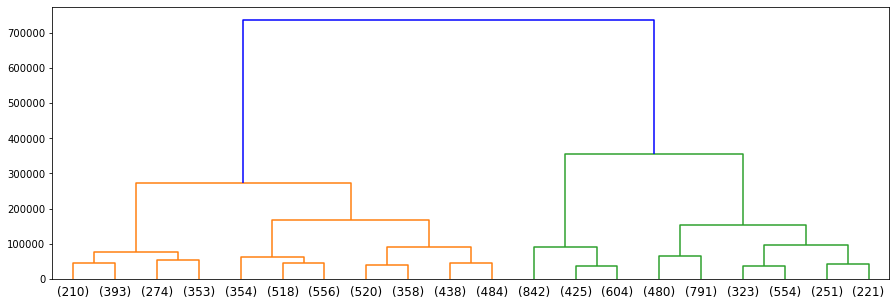

In [89]:


# First, we import the cluster hierarchy module from SciPy (described above) to obtain the linkage and dendrogram functions.
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))



den = hierarchy.dendrogram(Z, orientation='top', 
                           p=20, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='blue')
plt.show()

### END SOLUTION


## NEXT STEP PCA

- Perform PCA with `n_components` 
- Use elbow metode to determine n_components
- combine kmeans and agglomerative with pca to see clear customer segmentation


In [99]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 9):
    
    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(data_scaled)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n, 
                                             'features': data.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))
    
pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.309369
2,PCA(n_components=2),0.512528
3,PCA(n_components=3),0.608894
4,PCA(n_components=4),0.693575
5,PCA(n_components=5),0.757821
6,PCA(n_components=6),0.814453
7,PCA(n_components=7),0.857267
8,PCA(n_components=8),0.892534


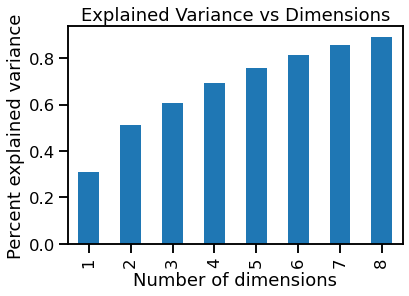

In [97]:
sns.set_context('talk')
ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

__THE QUESTION HOW WE IDENTIFY THE NUMBER OF PCA COMPONENTS .__

- WE USE THE ELBOW WAY TO DETERMINE THE VARIANCE EXPLAINED BASED ON IT.

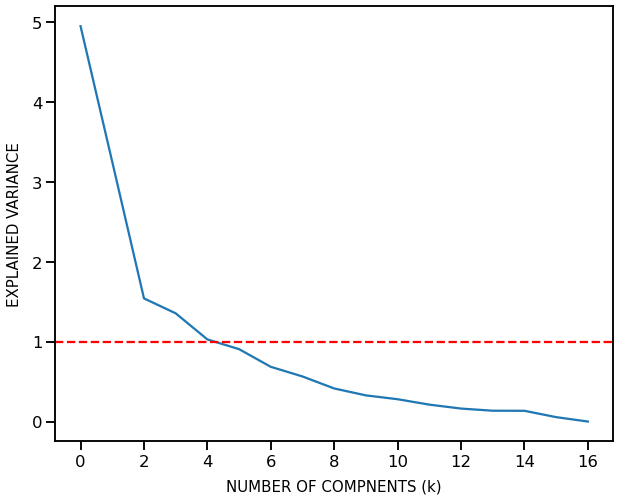

In [118]:

#17 is the max len of the columns

pca2= PCA(n_components=17)
pca2.fit(data_scaled)

plt.figure(figsize=(10,8))
plt.plot(np.arange(0,17),pca2.explained_variance_ )

plt.axhline(1,color='r',linestyle='--');
plt.ylabel("EXPLAINED VARIANCE", fontsize=15, labelpad=10)
plt.xlabel("NUMBER OF COMPNENTS (k)", fontsize=15, labelpad=10);

# we can see that  n_pca es 2

In [119]:

pca= PCA(n_components=2)
pricipal_comp= pca.fit_transform(data_scaled)
pricipal_comp


array([[-1.23635786, -2.8052573 ],
       [-2.47855649,  2.40645241],
       [ 1.37462938,  0.78714963],
       ...,
       [ 0.31957996, -2.96673752],
       [-2.00774872, -2.62524832],
       [ 1.05199738,  0.25593392]])

In [123]:

df_pca= pd.DataFrame(data=pricipal_comp,columns=["pca1","pca2"])
df_pca.head()

,pca1,pca2
0,-1.236358,-2.805257
1,-2.478556,2.406452
2,1.374629,0.787150
3,-0.775994,-0.347930
4,-1.465826,-2.022486


__We add the labels of the kmeans and agg clusters with the dataframe of the main components__

In [124]:

    
df_pca['kmeans']=predict    
df_pca['agglom'] = ag.fit_predict(data_scaled)
df_pca

,pca1,pca2,kmeans,agglom
0,-1.236358,-2.805257,3,1
1,-2.478556,2.406452,1,1
2,1.374629,0.787150,0,0
3,-0.775994,-0.347930,3,0
4,-1.465826,-2.022486,3,3
...,...,...,...,...
8945,0.769905,-2.384347,2,2
8946,0.714954,-2.136957,2,2
8947,0.319580,-2.966738,2,2
8948,-2.007749,-2.625248,3,2


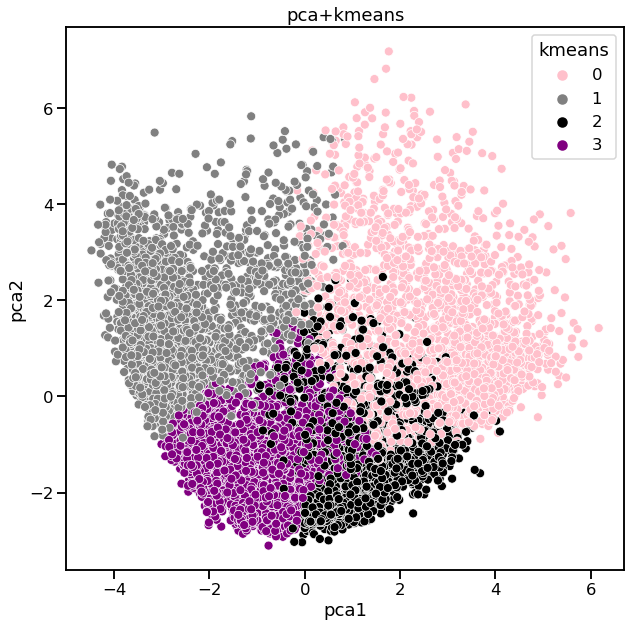

In [125]:
# now let's re-repress the data in point cloud using seaborn's scatterplot

plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1',y='pca2',data=df_pca,hue='kmeans',palette=["pink","gray","black","purple"])
plt.title("pca+kmeans")
plt.show()

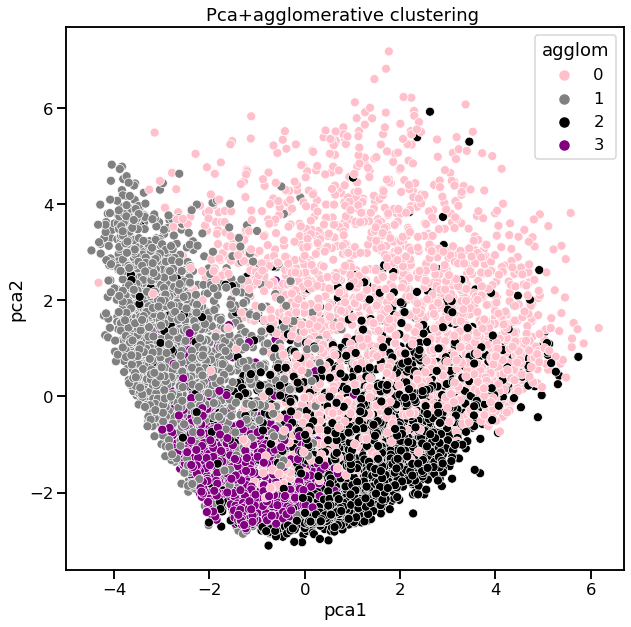

In [127]:

plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1',y='pca2',data=df_pca,hue='agglom',palette=["pink","gray","black","purple"])
plt.title("Pca+agglomerative clustering ")
plt.show()

- In the end I have managed to make an almost perfcta segmentation of the clients combining pca and kmeans. for a future review of maybe use deep learning to do clustering.
- I also have to try the different linkage agglomerative clustering metodos